# 1

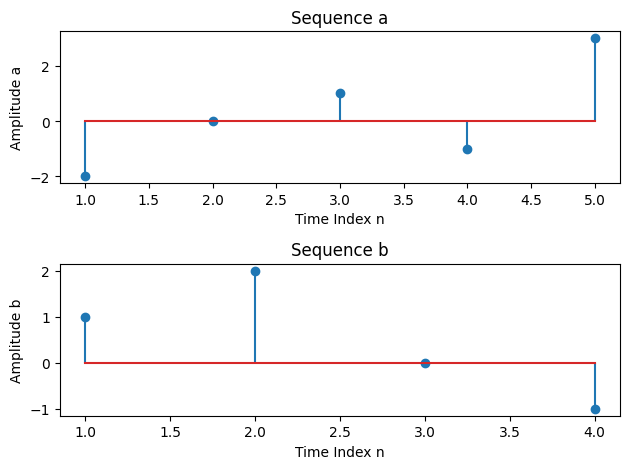

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Generating two sequences
a = [-2, 0, 1, -1, 3]
b = [1, 2, 0, -1]
d = 5
n = np.arange(1, d+1)
c = 4
l = np.arange(1, c+1)

plt.subplot(2, 1, 1)
plt.stem(n, a)
plt.xlabel('Time Index n')
plt.ylabel('Amplitude a')
plt.title('Sequence a')

plt.subplot(2, 1, 2)
plt.stem(l, b)
plt.xlabel('Time Index n')
plt.ylabel('Amplitude b')
plt.title('Sequence b')

plt.tight_layout()
plt.show()


# 2

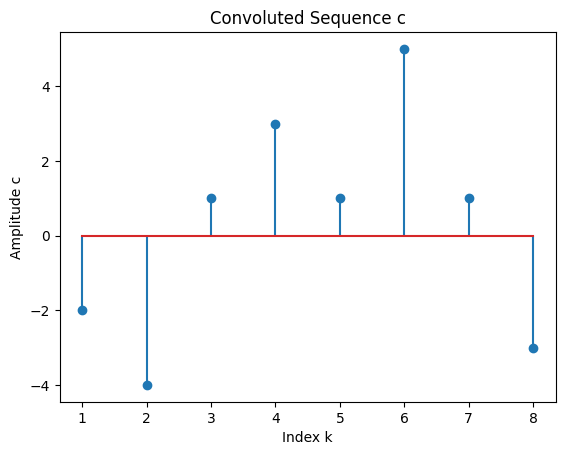

In [4]:
c = np.convolve(a, b)

# Define time index for convolution result
m = 8
k = np.arange(1, m+1)

# Plot the result
plt.stem(k, c)
plt.xlabel('Index k')
plt.ylabel('Amplitude c')
plt.title('Convoluted Sequence c')
plt.show()

# 3

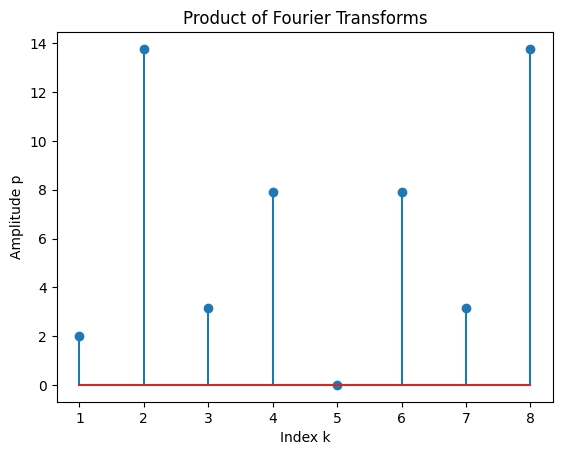

In [14]:
# Compute Fourier Transforms
AE = np.fft.fft(a, m)
BE = np.fft.fft(b, m)

# Compute element-wise product of Fourier Transforms
p = np.multiply(AE, BE)
values = np.abs(p)

# Plot the result
plt.stem(k, values)
plt.xlabel('Index k')
plt.ylabel('Amplitude p')
plt.title('Product of Fourier Transforms')
plt.show()


# 4

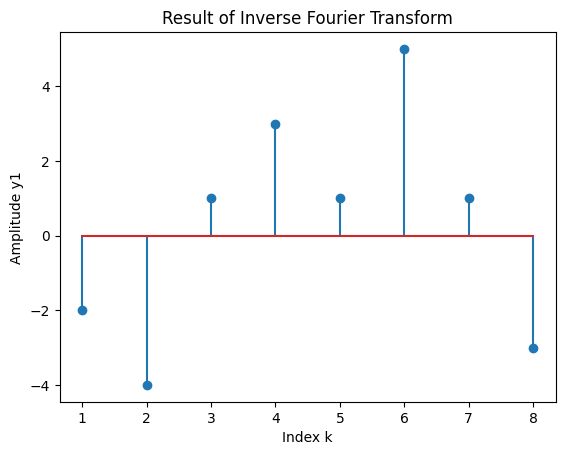

In [15]:
# Compute the inverse Fourier Transform
y1 = np.fft.ifft(p)

# Plot the result
plt.stem(k, y1)
plt.xlabel('Index k')
plt.ylabel('Amplitude y1')
plt.title('Result of Inverse Fourier Transform')
plt.show()

# 5

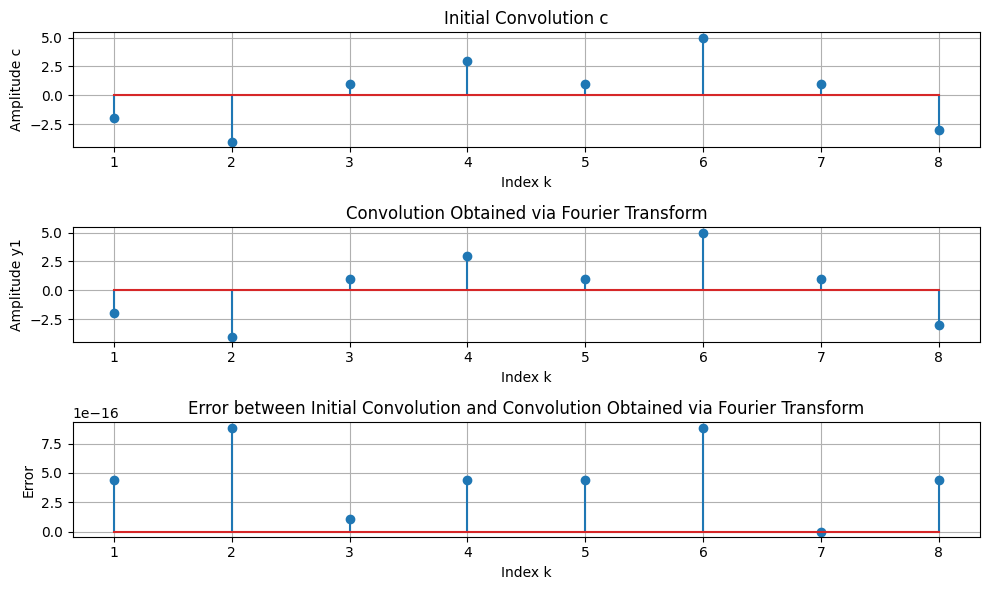

In [22]:
# Calculate error between initial convolution and the one obtained
# error = c[:m] - y1.real
error =  np.abs(c[:m] - y1.real)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot initial convolution
plt.subplot(3, 1, 1)
plt.grid()
plt.stem(k, c[:m])
plt.xlabel('Index k')
plt.ylabel('Amplitude c')
plt.title('Initial Convolution c')

# Plot convolution obtained using Fourier Transform
plt.subplot(3, 1, 2)
plt.grid()
plt.stem(k, y1.real)
plt.xlabel('Index k')
plt.ylabel('Amplitude y1')
plt.title('Convolution Obtained via Fourier Transform')

# Plot error
plt.subplot(3, 1, 3)
plt.grid()
plt.stem(k, error)
plt.xlabel('Index k')
plt.ylabel('Error')
plt.title('Error between Initial Convolution and Convolution Obtained via Fourier Transform')

plt.tight_layout()
plt.show()

# 6.1

In [26]:
import scipy.signal as signal

# Define the length of the sequences
length = 2**16

# Generate sequences using cosine and square waves
long_a = np.cos(np.arange(0, length))
long_b = signal.square(np.arange(0, length))

# 6.2

In [29]:
import time

# Define a function to perform direct convolution
def direct_convolution(a, b):
    return np.convolve(a, b)

# Measure time for direct convolution
start_time = time.time()
conv_result = direct_convolution(long_a, long_b)
end_time = time.time()
direct_conv_time = end_time - start_time
print("Time taken for direct convolution:", direct_conv_time, "seconds")

Time taken for direct convolution: 19.197606086730957 seconds


# 6.3

In [30]:
# Define a function to perform convolution using FFT
def fft_convolution(a, b):
    a_fft = np.fft.fft(a, len(a) + len(b) - 1)
    b_fft = np.fft.fft(b, len(a) + len(b) - 1)
    a_fft_times_b_fft = a_fft * b_fft
    return np.fft.ifft(a_fft_times_b_fft).real

# Measure time for convolution using FFT
start_time = time.time()
fft_conv_result = fft_convolution(long_a, long_b)
end_time = time.time()
fft_conv_time = end_time - start_time
print("Time taken for convolution using FFT:", fft_conv_time, "seconds")

Time taken for convolution using FFT: 0.17940711975097656 seconds


# 7

In [31]:
lengths = [2**17, 2**18, 2**19]

# Initialize lists to store time taken for each length
direct_conv_times = []
fft_conv_times = []

# Repeat for each length
for length in lengths:
    # Generate sequences using cosine and square waves
    a = np.cos(np.arange(0, length))
    b = signal.square(np.arange(0, length))

# Measure time for direct convolution
    start_time = time.time()
    conv_result = np.convolve(a, b)
    end_time = time.time()
    direct_conv_time = end_time - start_time
    direct_conv_times.append(direct_conv_time)
    print(f"Time taken for direct convolution at length {length}: {direct_conv_time} seconds")

# Measure time for convolution using FFT
    start_time = time.time()
    fft_conv_result = fft_convolution(a, b)
    end_time = time.time()
    fft_conv_time = end_time - start_time
    fft_conv_times.append(fft_conv_time)
    print(f"Time taken for convolution using FFT at length {length}: {fft_conv_time} seconds")

Time taken for direct convolution at length 131072: 44.27929449081421 seconds
Time taken for convolution using FFT at length 131072: 0.08000016212463379 seconds
Time taken for direct convolution at length 262144: 96.6070556640625 seconds
Time taken for convolution using FFT at length 262144: 0.6438863277435303 seconds
Time taken for direct convolution at length 524288: 214.8921821117401 seconds
Time taken for convolution using FFT at length 524288: 0.3529999256134033 seconds


# 8

In [34]:
# Define the signals
a = np.array([1, 2, 3, 4, 5, 4, 3, 3, 2, 2, 1, 1])
b = np.array([1, 4, 2])

# Perform convolution
conv_result = np.convolve(a, b)

# Print the result
print(conv_result)

[ 1  6 13 20 27 32 29 23 20 16 13  9  6  2]


# 9

In [35]:
# Divide the input signal into two blocks
a1 = a[:6]
a2 = a[6:]

# Perform convolution on each block
block1 = np.convolve(a1, b)
block2 = np.convolve(a2, b)

# Print the results
print("Block 1:", block1)
print("Block 2:", block2)

Block 1: [ 1  6 13 20 27 32 26  8]
Block 2: [ 3 15 20 16 13  9  6  2]


# 10

Combined blocks: [ 1.  6. 13. 20. 27. 32. 26. 11. 15. 20. 16. 13.  9.  6.  2.]
Direct convolution: [ 1  6 13 20 27 32 29 23 20 16 13  9  6  2]


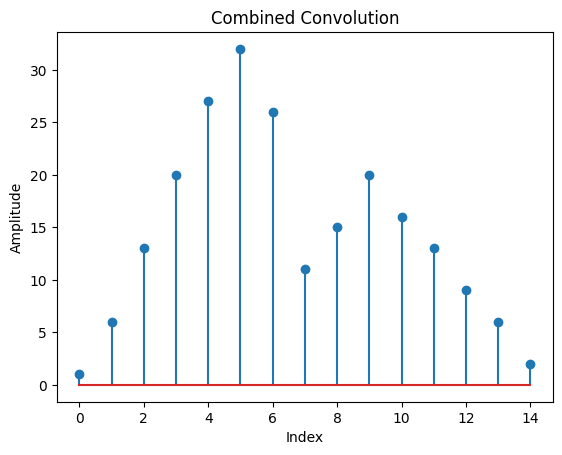

In [39]:
# Combine the blocks
combined_blocks_length = len(block1) + len(block2) - 1
combined_blocks = np.zeros(combined_blocks_length)
combined_blocks[:len(block1)] = block1
combined_blocks[len(block1)-1:] += block2

# Print the combined blocks
print("Combined blocks:", combined_blocks)

# Print the direct convolution
print("Direct convolution:", np.convolve(a, b))

# Plot the combined convolution
plt.stem(combined_blocks)
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.title('Combined Convolution')
plt.show()